In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange
from tqdm.notebook import tqdm
from scipy.signal import correlate
import os
import scipy as sp
import scipy.optimize

from isingpackage import*

%matplotlib inline

  0%|          | 0/39 [00:00<?, ?it/s]

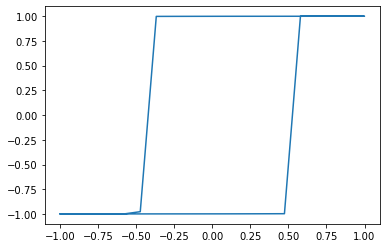

In [39]:
N=64
T=1

H_points = 20
muH_max = 1

eq_wait = 1000
measurements = 1000



forward = np.linspace(-muH_max, muH_max, H_points)
backward = np.linspace(muH_max, -muH_max, H_points)[1:]
muHs = np.concatenate((forward, backward), axis=0)
Ms = []
array = spin_array(N=N, randomseed = 123)

for muH in tqdm(muHs):

    M_list = []

    for i in range(eq_wait):
        array.update_array(T=T, muH=muH)


    for i in range(measurements):
        array.update_array(T=T, muH=muH)
        M_list.append(array.get_M_mean())
    
    Ms.append(np.mean(M_list))

plt.scatter(muHs, Ms)

In [41]:
N=64

H_points = 100
muH_max = 1

eq_wait = 1000
measurements = 1000

Ts = np.linspace(1,3,21)

forward = np.linspace(-muH_max, muH_max, H_points)
backward = np.linspace(muH_max, -muH_max, H_points)[1:]
muHs = np.concatenate((forward, backward), axis=0)
Ms = []

string = ''

for muH in muHs:
    
    string += ('{},'.format(muH))

string = string[:-1] + '\n'


for T in tqdm(Ts):

    array = spin_array(N=N, randomseed = int(T*100))
    print('T={}'.format(T))

    for muH in tqdm(muHs):

        current_measurements = []

        for i in range(eq_wait):
            array.update_array(T=T, muH=muH)


        for i in range(measurements):
            array.update_array(T=T, muH=muH)
            current_measurements.append(array.get_M_mean())
        
        string += '{},'.format(np.mean(current_measurements))
    
    string = string[:-1] + '\n'

    with open('measurements\\Hysteresis.csv', 'w') as f:
        f.write(string)

  0%|          | 0/21 [00:00<?, ?it/s]

T=1.0


  0%|          | 0/199 [00:00<?, ?it/s]

T=1.1


  0%|          | 0/199 [00:00<?, ?it/s]

T=1.2


  0%|          | 0/199 [00:00<?, ?it/s]

T=1.3


  0%|          | 0/199 [00:00<?, ?it/s]

T=1.4


  0%|          | 0/199 [00:00<?, ?it/s]

T=1.5


  0%|          | 0/199 [00:00<?, ?it/s]

T=1.6


  0%|          | 0/199 [00:00<?, ?it/s]

T=1.7000000000000002


  0%|          | 0/199 [00:00<?, ?it/s]

T=1.8


  0%|          | 0/199 [00:00<?, ?it/s]

T=1.9


  0%|          | 0/199 [00:00<?, ?it/s]

T=2.0


  0%|          | 0/199 [00:00<?, ?it/s]

T=2.1


  0%|          | 0/199 [00:00<?, ?it/s]

T=2.2


  0%|          | 0/199 [00:00<?, ?it/s]

T=2.3


  0%|          | 0/199 [00:00<?, ?it/s]

T=2.4000000000000004


  0%|          | 0/199 [00:00<?, ?it/s]

T=2.5


  0%|          | 0/199 [00:00<?, ?it/s]

T=2.6


  0%|          | 0/199 [00:00<?, ?it/s]

T=2.7


  0%|          | 0/199 [00:00<?, ?it/s]

T=2.8


  0%|          | 0/199 [00:00<?, ?it/s]

T=2.9000000000000004


  0%|          | 0/199 [00:00<?, ?it/s]

T=3.0


  0%|          | 0/199 [00:00<?, ?it/s]

In [ ]:
Ns = [5,10,15,20,25,32]

for N in Ns:

    print('N={}'.format(N))
    
    measurements=1000

    repeat = 20

    string = ''

    Ts = np.linspace(1,3, 100)

    for T in tqdm(Ts):

        string += '{} '.format(T)

        for i in range(repeat):

            C = heat_capacity(N=N, T=T, measurements=measurements, max_tries=100)

            string = string + ', ' + str(C) 

        string += '\n'

        with open('measurements\\C_{}.csv'.format(N), 'w') as f:
            f.write(string)